In [1]:
#import model building libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

C:\Users\adarsha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# IMAGE PREPROCESSING


In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
#2.configure image data generator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
#3.Apply image data generator functionality to train and test images
x_train=train_datagen.flow_from_directory(r'A:\A\animal-data\dataset\Training',target_size=(64,64),batch_size=32,class_mode="categorical")
x_test=test_datagen.flow_from_directory(r'A:\A\animal-data\dataset\testing',target_size=(64,64),batch_size=32,class_mode="categorical")


Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [5]:
print(x_train.class_indices)

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}


In [6]:
print(x_test.class_indices)

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}


# Model Building

In [7]:
#2.initializing the model
model=Sequential()

In [8]:
#3.add convolution layer(no.of filters,size of filter,input shape)
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [9]:
#add max pool layer(pool_size)
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
#add flatten layer  ---input of ann
model.add(Flatten())

In [11]:
#ann hidden layer
model.add(Dense(units=128,activation="relu"))

In [12]:
#add output layer
model.add(Dense(units=4,activation="softmax"))# units =4 bcz in output having 4 classes omly

In [13]:
#Compile the model (loss fucntion,accuracy,optimizer)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics="accuracy")


In [14]:
#fit model (x_train,steps_per epoch,epochs,validation_data,validation_steps)
model.fit(x_train,steps_per_epoch=39,epochs=5,validation_data=x_test,validation_steps=10)


Epoch 1/5
39/39 [==============================] - 10s 239ms/step - loss: 1.7757 - accuracy: 0.3013 - val_loss: 1.2664 - val_accuracy: 0.3781
Epoch 2/5
39/39 [==============================] - 8s 197ms/step - loss: 1.1201 - accuracy: 0.5073 - val_loss: 0.9154 - val_accuracy: 0.6313
Epoch 3/5
39/39 [==============================] - 8s 207ms/step - loss: 0.9287 - accuracy: 0.6309 - val_loss: 0.7866 - val_accuracy: 0.7000
Epoch 4/5
39/39 [==============================] - 8s 207ms/step - loss: 0.8200 - accuracy: 0.6745 - val_loss: 0.6467 - val_accuracy: 0.7563
Epoch 5/5
39/39 [==============================] - 8s 199ms/step - loss: 0.7032 - accuracy: 0.7270 - val_loss: 0.5545 - val_accuracy: 0.8094


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 128)               3936384   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3937796 (15.02 MB)
Trainable params: 3937796 (15.02 MB)
Non-trainable params: 0 (0.00 Byte)
________________

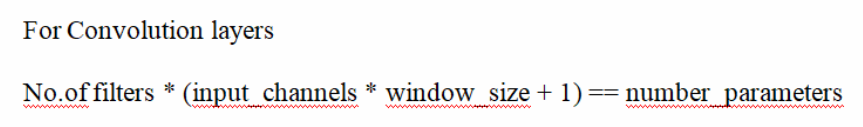

In [16]:
32 * (3*(3*3)+1)

896

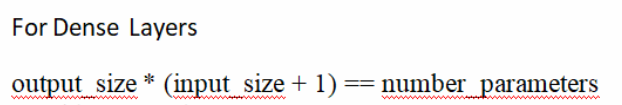

In [17]:
#dense
128*(30752+1)

3936384

In [18]:
# dense_1 (Dense) 
4*(128+1)


516

In [19]:
#save our model
model.save("animal.h5")

C:\Users\adarsha\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Test the model

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [21]:
import tensorflow as tf

In [22]:
model=tf.keras.models.load_model(r"A:\A\animal.h5",compile=False)

In [73]:

#D:\SmartBridge\VIT_morning_slot\dataset\Testing\elephants\nature_3306013__340.jpg
img=image.load_img(r"A:\A\elephant_test.jpeg",target_size=(64,64))

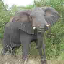

In [74]:
img

In [75]:
x=image.img_to_array(img)

In [76]:
x

array([[[132., 146., 120.],
        [146., 159., 139.],
        [242., 254., 242.],
        ...,
        [103., 134.,  75.],
        [134., 165., 106.],
        [138., 169., 110.]],

       [[170., 185., 152.],
        [170., 184., 158.],
        [178., 191., 173.],
        ...,
        [124., 154., 102.],
        [129., 159., 107.],
        [152., 182., 130.]],

       [[164., 181., 139.],
        [181., 197., 161.],
        [141., 155., 129.],
        ...,
        [140., 169., 125.],
        [125., 154., 110.],
        [162., 191., 147.]],

       ...,

       [[163., 155., 136.],
        [150., 142., 123.],
        [140., 132., 113.],
        ...,
        [169., 164., 122.],
        [169., 164., 122.],
        [169., 164., 122.]],

       [[148., 140., 121.],
        [154., 146., 127.],
        [158., 150., 131.],
        ...,
        [169., 164., 122.],
        [169., 164., 122.],
        [169., 164., 122.]],

       [[159., 151., 132.],
        [155., 147., 128.],
        [130., 1

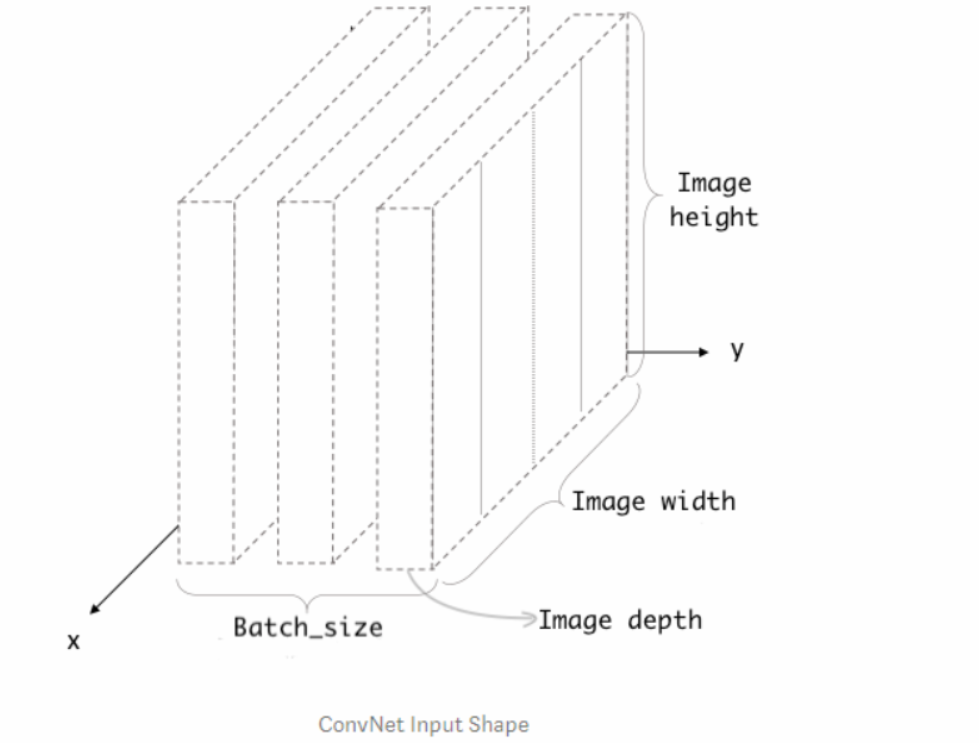

In [77]:
x=np.expand_dims(x,axis=0)

In [78]:
x.ndim

4

In [79]:
x.shape

(1, 64, 64, 3)

In [80]:
pred=model.predict(x)


1/1 [==============================] - 0s 40ms/step


In [81]:
pred

array([[0.000000e+00, 0.000000e+00, 1.000000e+00, 5.093889e-20]],
      dtype=float32)

In [82]:
pred_class=np.argmax(pred,axis=1)

In [83]:
pred_class

array([2], dtype=int64)

In [84]:
index=['bears', 'crows', 'elephants', 'rats']
result=(index[pred_class[0]])

In [85]:
result

'elephants'